In [1]:
import math
import copy
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data_set=pd.read_csv("C:/Users/MY/Desktop/数据挖掘实验/实验4：聚类/WorldCup.csv",engine="python")
data_list=data_set.values.tolist()
print(len(data_list))
print(data_list)

20
[[0, '中国', 73, 40, 7], [1, '日本', 60, 15, 5], [2, '韩国', 61, 19, 2], [3, '伊朗', 34, 18, 6], [4, '沙特', 67, 26, 10], [5, '伊拉克', 91, 40, 4], [6, '卡塔尔', 101, 40, 13], [7, '阿联酋', 81, 40, 6], [8, '乌兹别克斯坦', 88, 40, 6], [9, '泰国', 122, 40, 17], [10, '越南', 102, 50, 17], [11, '阿曼', 87, 50, 17], [12, '巴林', 116, 50, 11], [13, '朝鲜', 110, 50, 14], [14, '印尼', 164, 50, 17], [15, '澳洲', 40, 30, 1], [16, '叙利亚', 76, 40, 17], [17, '约旦', 118, 50, 9], [18, '科威特', 160, 50, 15], [19, '巴勒斯坦', 96, 50, 16]]


In [7]:
cluster_centers=[data_list[3],data_list[5],data_list[14]] #初始三个聚类中心点
k_medoids(data_list,cluster_centers)

3
5
14


(702,
 [[1, '日本', 60, 15, 5],
  [2, '韩国', 61, 19, 2],
  [3, '伊朗', 34, 18, 6],
  [15, '澳洲', 40, 30, 1]],
 [[0, '中国', 73, 40, 7],
  [4, '沙特', 67, 26, 10],
  [5, '伊拉克', 91, 40, 4],
  [6, '卡塔尔', 101, 40, 13],
  [7, '阿联酋', 81, 40, 6],
  [8, '乌兹别克斯坦', 88, 40, 6],
  [9, '泰国', 122, 40, 17],
  [10, '越南', 102, 50, 17],
  [11, '阿曼', 87, 50, 17],
  [12, '巴林', 116, 50, 11],
  [13, '朝鲜', 110, 50, 14],
  [16, '叙利亚', 76, 40, 17],
  [17, '约旦', 118, 50, 9],
  [19, '巴勒斯坦', 96, 50, 16]],
 [[14, '印尼', 164, 50, 17], [18, '科威特', 160, 50, 15]])

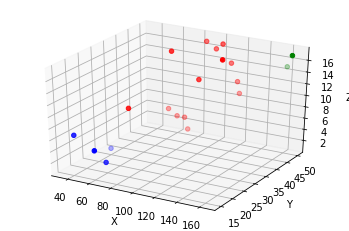

In [3]:
result=k_medoids(data_list,cluster_centers)
best_clusters=[result[1],result[2],result[3]]
#画出散点图直观观察
set0=[]
set1=[]
set2=[]
total_set=[set0,set1,set2]
for clust_idx in range(0,3): #k_means的返回值中的索引：簇的序号
    for idx in range(2,5): #坐标序号
        for country in best_clusters[clust_idx]:
            total_set[clust_idx].append(country[idx])

ax=plt.subplot(111,projection='3d')
ax.scatter(set0[:len(best_clusters[0])],set0[len(best_clusters[0]):2*len(best_clusters[0])],set0[2*len(best_clusters[0]):],c='b')
ax.scatter(set1[:len(best_clusters[1])],set1[len(best_clusters[1]):2*len(best_clusters[1])],set1[2*len(best_clusters[1]):],c='r')
ax.scatter(set2[:len(best_clusters[2])],set2[len(best_clusters[2]):2*len(best_clusters[2])],set2[2*len(best_clusters[2]):],c='g')

ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()  

In [2]:
#先随机挑选3个中心点,(我这里是指定)
cluster_centers=[data_list[3],data_list[5],data_list[14]] #初始的三个中心点
#data_list包含所有的点,每一个元素形式为:[0, '中国', 73, 40, 7],第一位是序号,后三位是3个排名
#cluster_centers包含3个代表对象
def k_medoids(data_list,cluster_centers):    
    flag=1   #标志位用于判断和上次的目标函数是否相同
    while (flag) :
        cluster0=[] #存放1簇
        cluster1=[] #存放2簇
        cluster2=[] #存放3簇
        total_clusters=[cluster0,cluster1,cluster2] #包含3个簇
        distance=[]  #存放距离
        #每个国家都要计算到3个代表对象的距离
        for country in data_list:
            for center in cluster_centers:
                sum_sqrt_error=0
                for i in range(2,5): #计算曼哈顿距离
                    #曼哈顿距离取消了欧式距离的平方，因此使得离群点的影响减弱。
                    sum_sqrt_error+=abs(country[i]-center[i])
                distance.append(sum_sqrt_error)#存储了3个距离
            cluster_num=distance.index(min(distance)) #找最小距离对应的点的序号
            distance.clear()
            if cluster_num==0: #序号为0,就归到第一个簇
                cluster0.append(country)
            elif cluster_num==1:
                cluster1.append(country)
            else:
                cluster2.append(country)

        #计算目标函数E：
        #簇内的点到簇质心的曼哈顿距离的和
        E_prim=0
        for cluster_idx in range(0,3):
            for country in total_clusters[cluster_idx]:
                for idx in range(2,5):
                    E_prim+=abs(country[idx]-cluster_centers[cluster_idx][idx])
    
        #每个簇里重新选老大(遍历除了c1,c2,c3点外的所有点分别替代c1,c2,c3)
        #先把中心点排除,得到子集
        copy_data_list=copy.copy(data_list)
        for n in range(3):
            copy_data_list.pop(cluster_centers[n][0])#删除中心点
            
        copy_cluster_centers=copy.copy(cluster_centers)#用拷贝,否则元素会一起变化
        
        #把所有非中心点拿来分别替换c1,c2,c3,计算目标函数,取最小的作为新老大
        E_min=E_prim
        for center_idx in range(3): #每次只换一个中心点
            for country in copy_data_list:
                copy_cluster_centers[center_idx]=country #替换
                #以新的3个中心点聚类
                clust1=[] #簇1
                clust2=[] #簇2
                clust3=[] #簇3
                all_clusters=[clust1,clust2,clust3]  #包含3个簇
                
                #每个国家都要计算到3个代表对象的距离
                for country in copy_data_list:
                    for center in copy_cluster_centers:
                        sum_sqrt_error=0
                        for i in range(2,5): #计算曼哈顿距离
                            #曼哈顿距离取消了欧式距离的平方，因此使得离群点的影响减弱。
                            sum_sqrt_error+=abs(country[i]-center[i])
                        distance.append(sum_sqrt_error)#存储了3个距离
                    cluster_num=distance.index(min(distance)) #找最小距离对应的点的序号
                    distance.clear() #清空距离
                    if cluster_num==0:   #序号为0,就归到第一个簇
                        clust1.append(country)
                    elif cluster_num==1: #序号为1,就归到第二簇
                        clust2.append(country)
                    else:                #序号为2,就归到第三簇
                        clust3.append(country)
                
                #重新计算目标函数，看是否发生改变
                E_new=0
                for cluster_idx in range(0,3): #分开计算3个簇
                    for country in all_clusters[cluster_idx]:
                        for idx in range(2,5):
                            E_new+=abs(country[idx]-cluster_centers[cluster_idx][idx])
                #如果这次替换使目标函数变小了，就更新代表对象
                if(E_new<E_min):
                    E_min=E_new
                    cluster_centers=copy_cluster_centers
                   
        #判断如果把c1,c2,c3都替换了一边之后目标函数没有变化,就停止循环
        if(E_prim==E_new):
            flag=0 
        else:
            return(E_new,cluster0,cluster1,cluster2)